<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Ник на kaggle: Kamil Baiazitov

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('datasets/train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [11]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

nan'ы отсутствуют, однако далее были получены ошибки, связанные с наличием пробелов

In [172]:
[(data[col] == ' ').sum() for col in data.columns]

[0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

## Анализ категориальных признаков

In [160]:
from matplotlib import gridspec

In [161]:
len(cat_cols)

16

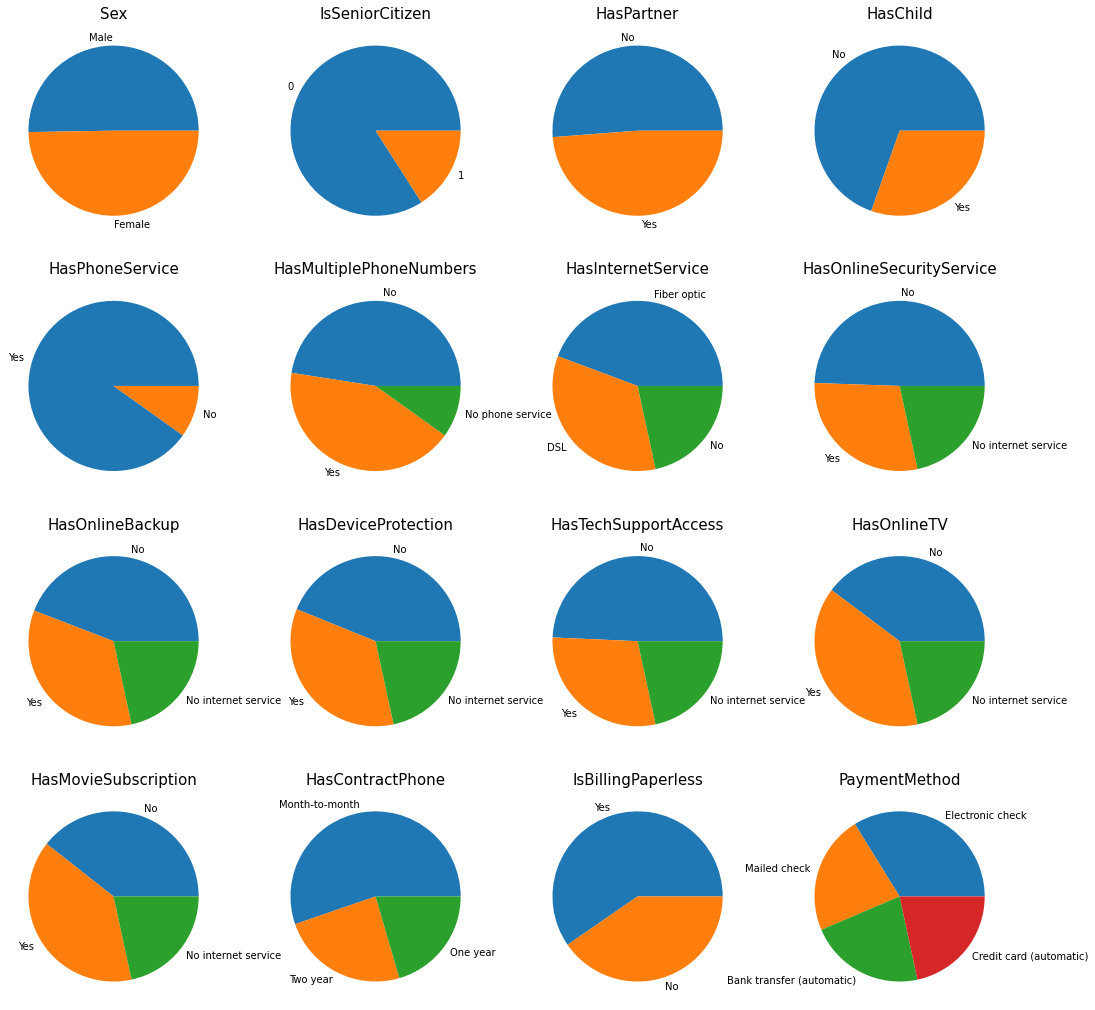

In [159]:
fig, gs = plt.figure(figsize=(18,18)), gridspec.GridSpec(4, 4)

ax = []

for i, col in enumerate(cat_cols):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].pie(data[col].value_counts(), labels=data[col].value_counts().index)
    ax[i].set_title(col, fontsize=15)

В основном классы достаточно сбалансированы

## Анализ численных признаков

Заменим пробелы на nan'ы и вызовем dropna()

In [9]:
(data['TotalSpent'] == ' ').sum()

9

In [173]:
data = data.replace(' ', np.nan)
data = data.dropna()

Также в колонке TotalSpent лежат числа, однако в формате string, переведем во float

In [11]:
data['TotalSpent'] = data['TotalSpent'].astype(float)

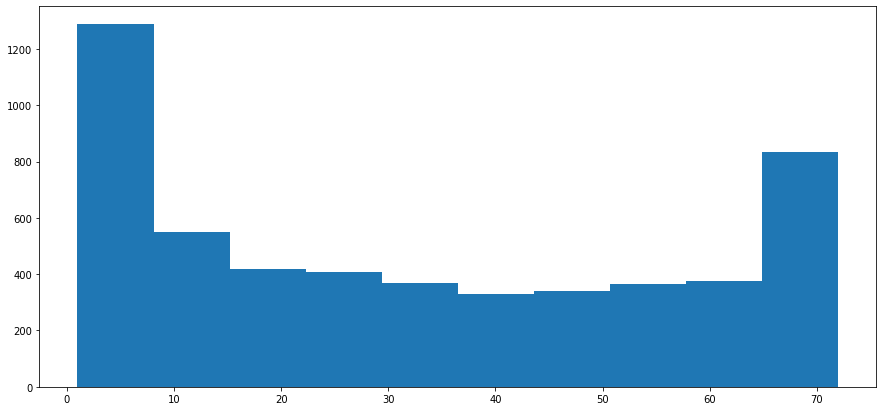

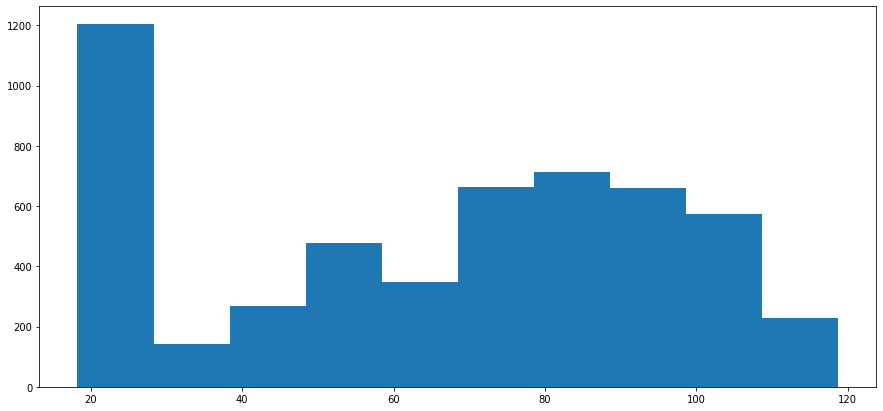

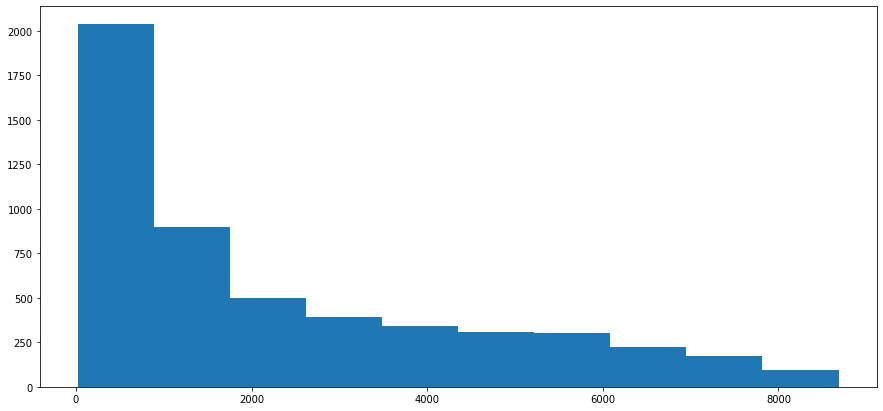

In [39]:
for col in num_cols:
    plt.figure(figsize=(15,7))
    plt.hist(data[col])
    plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [13]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [15]:
numeric_data = data[num_cols]
categorial_data = data[cat_cols]
dummy_features = pd.get_dummies(categorial_data) # One-hot encoding

X = pd.concat([numeric_data, dummy_features], axis=1)
y = data['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # Обучаем scaler только на train выборке
X_valid_scaled = scaler.transform(X_valid) 

In [16]:
model = LogisticRegressionCV(scoring='roc_auc', refit=True)
model.fit(X_train_scaled, y_train)
print(f'roc-auc score: {model.score(X_valid_scaled, y_valid)}')
print(f'C value = {model.C_}')

roc-auc score: 0.843798065581505
C value = [21.5443469]


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [17]:
!pip install -q catboost
import catboost

     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [18]:
X = data[feature_cols]
y = data[target_col]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    random_state=42)

Протестируем модель с дефолтными параметрами

In [19]:
boosting_model_default = catboost.CatBoostClassifier(cat_features=cat_cols,
                                             silent=True)

boosting_model_default.fit(X_train, y_train)

y_valid_predicted = boosting_model_default.predict_proba(X_valid)[:, 1]
print(f'roc-auc score: {roc_auc_score(y_valid, y_valid_predicted)}')
print(f'learning rate = {boosting_model_default.learning_rate_}')
print(f'num trees = {boosting_model_default.tree_count_}')

roc-auc score: 0.8404411417787214
learning rate = 0.019047999754548073
num trees = 1000


Подберем параметры

In [33]:
boosting_model_custom = catboost.CatBoostClassifier(cat_features=cat_cols,
                                             silent=True,
                                             eval_metric='AUC')

boosting_model_custom.grid_search({'learning_rate': [0.01, 0.05, 0.075, 0.1, 1.5, 0.2, 0.5],
                                   'depth': [2,3,4,5],
                                   'n_estimators': [100, 200, 500, 1000]}, 
                                   X_train, 
                                   y_train,
                                   refit=True)


bestTest = 0.8429498428
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8429498	best: 0.8429498 (0)	total: 368ms	remaining: 40.8s

bestTest = 0.8668861777
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8668862	best: 0.8668862 (1)	total: 741ms	remaining: 40.8s

bestTest = 0.8698210194
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8698210	best: 0.8698210 (2)	total: 1.11s	remaining: 40.5s

bestTest = 0.8682417787
bestIteration = 79

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8682418	best: 0.8698210 (2)	total: 1.5s	remaining: 40.4s


learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8454890141
bestIteration = 22

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
4:	loss: 0.8454890	best: 0.8698210 (2)	total: 1.88s	remaining: 40.2s

bestTest = 0.8699380002
bestIteration = 41

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
5:	loss: 0.8699380	best: 0.8699380 (5)	total: 2.25s	remaining: 39.8s

bestTest = 0.8664733043
bestIteration = 33

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
6:	loss: 0.8664733	best: 0.8699380 (5)	total: 2.64s	remaining: 39.6s

bestTest = 0.8637552211
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
7:	loss: 0.8637552	best: 0.8699380 (5)	total: 3.5s	remaining: 45.5s

bestTes

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8521741225
bestIteration = 21

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
11:	loss: 0.8521741	best: 0.8699380 (5)	total: 7.06s	remaining: 58.9s

bestTest = 0.8676052655
bestIteration = 32

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
12:	loss: 0.8676053	best: 0.8699380 (5)	total: 7.99s	remaining: 1m

bestTest = 0.8665662008
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
13:	loss: 0.8665662	best: 0.8699380 (5)	total: 8.91s	remaining: 1m 2s

bestTest = 0.8677084839
bestIteration = 499

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
14:	loss: 0.8677085	best: 0.8699380 (5)	total: 11s	remaining: 1m 11s

bestTe

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8521741225
bestIteration = 21

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
18:	loss: 0.8521741	best: 0.8699380 (5)	total: 19.9s	remaining: 1m 37s

bestTest = 0.8676052655
bestIteration = 32

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
19:	loss: 0.8676053	best: 0.8699380 (5)	total: 22.2s	remaining: 1m 41s

bestTest = 0.8665662008
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
20:	loss: 0.8665662	best: 0.8699380 (5)	total: 24.5s	remaining: 1m 46s

bestTest = 0.8687028206
bestIteration = 841

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
21:	loss: 0.8687028	best: 0.8699380 (5)	total: 28.8s	remaining: 1m 57s

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8521741225
bestIteration = 21

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
25:	loss: 0.8521741	best: 0.8699380 (5)	total: 46.8s	remaining: 2m 34s

bestTest = 0.8676052655
bestIteration = 32

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
26:	loss: 0.8676053	best: 0.8699380 (5)	total: 51.4s	remaining: 2m 41s

bestTest = 0.8665662008
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
27:	loss: 0.8665662	best: 0.8699380 (5)	total: 56s	remaining: 2m 48s

bestTest = 0.8479008829
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
28:	loss: 0.8479009	best: 0.8699380 (5)	total: 56.4s	remaining: 2m 41s

b

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8472540479
bestIteration = 24

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
32:	loss: 0.8472540	best: 0.8699380 (5)	total: 58.2s	remaining: 2m 19s

bestTest = 0.8686305678
bestIteration = 47

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8686306	best: 0.8699380 (5)	total: 58.6s	remaining: 2m 14s

bestTest = 0.8605829772
bestIteration = 13

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8605830	best: 0.8699380 (5)	total: 59.1s	remaining: 2m 9s

bestTest = 0.8640167076
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8640167	best: 0.8699380 (5)	total: 1m	remaining: 2m 7s

bes

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8428535056
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
39:	loss: 0.8428535	best: 0.8699380 (5)	total: 1m 5s	remaining: 1m 57s

bestTest = 0.8680835105
bestIteration = 75

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
40:	loss: 0.8680835	best: 0.8699380 (5)	total: 1m 6s	remaining: 1m 54s

bestTest = 0.8666625379
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
41:	loss: 0.8666625	best: 0.8699380 (5)	total: 1m 7s	remaining: 1m 52s

bestTest = 0.8674091507
bestIteration = 432

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
42:	loss: 0.8674092	best: 0.8699380 (5)	total: 1m 10s	remaining: 1m 53

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8428535056
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
46:	loss: 0.8428535	best: 0.8699380 (5)	total: 1m 22s	remaining: 1m 54s

bestTest = 0.8680835105
bestIteration = 75

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
47:	loss: 0.8680835	best: 0.8699380 (5)	total: 1m 26s	remaining: 1m 54s

bestTest = 0.8666625379
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
48:	loss: 0.8666625	best: 0.8699380 (5)	total: 1m 29s	remaining: 1m 55s

bestTest = 0.8683037097
bestIteration = 957

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
49:	loss: 0.8683037	best: 0.8699380 (5)	total: 1m 35s	remaining: 1m

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8428535056
bestIteration = 11

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
53:	loss: 0.8428535	best: 0.8699380 (5)	total: 2m 1s	remaining: 2m 10s

bestTest = 0.8680835105
bestIteration = 75

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
54:	loss: 0.8680835	best: 0.8699380 (5)	total: 2m 8s	remaining: 2m 12s

bestTest = 0.8666625379
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
55:	loss: 0.8666625	best: 0.8699380 (5)	total: 2m 14s	remaining: 2m 14s

bestTest = 0.8448112136
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
56:	loss: 0.8448112	best: 0.8699380 (5)	total: 2m 15s	remaining: 2m 10

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8352256697
bestIteration = 3

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
60:	loss: 0.8352257	best: 0.8699380 (5)	total: 2m 17s	remaining: 1m 54s

bestTest = 0.8664801855
bestIteration = 57

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
61:	loss: 0.8664802	best: 0.8699380 (5)	total: 2m 17s	remaining: 1m 50s

bestTest = 0.8664182545
bestIteration = 20

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
62:	loss: 0.8664183	best: 0.8699380 (5)	total: 2m 18s	remaining: 1m 47s

bestTest = 0.8658918409
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
63:	loss: 0.8658918	best: 0.8699380 (5)	total: 2m 19s	remaining: 1m 

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8393165569
bestIteration = 3

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
67:	loss: 0.8393166	best: 0.8706433 (66)	total: 2m 25s	remaining: 1m 34s

bestTest = 0.8697040386
bestIteration = 81

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
68:	loss: 0.8697040	best: 0.8706433 (66)	total: 2m 27s	remaining: 1m 31s

bestTest = 0.8632700949
bestIteration = 28

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
69:	loss: 0.8632701	best: 0.8706433 (66)	total: 2m 29s	remaining: 1m 29s

bestTest = 0.867680959
bestIteration = 419

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
70:	loss: 0.8676810	best: 0.8706433 (66)	total: 2m 33s	remaining: 

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8393165569
bestIteration = 3

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
74:	loss: 0.8393166	best: 0.8706433 (66)	total: 2m 49s	remaining: 1m 23s

bestTest = 0.8697040386
bestIteration = 81

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
75:	loss: 0.8697040	best: 0.8706433 (66)	total: 2m 53s	remaining: 1m 22s

bestTest = 0.8632700949
bestIteration = 28

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
76:	loss: 0.8632701	best: 0.8706433 (66)	total: 2m 58s	remaining: 1m 20s

bestTest = 0.8679665297
bestIteration = 895

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
77:	loss: 0.8679665	best: 0.8706433 (66)	total: 3m 5s	remaining: 

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8393165569
bestIteration = 3

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
81:	loss: 0.8393166	best: 0.8706433 (66)	total: 3m 38s	remaining: 1m 20s

bestTest = 0.8697040386
bestIteration = 81

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
82:	loss: 0.8697040	best: 0.8706433 (66)	total: 3m 48s	remaining: 1m 19s

bestTest = 0.8632700949
bestIteration = 28

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
83:	loss: 0.8632701	best: 0.8706433 (66)	total: 3m 56s	remaining: 1m 18s

bestTest = 0.8495214109
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
84:	loss: 0.8495214	best: 0.8706433 (66)	total: 3m 57s	remaining: 

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.835081164
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
88:	loss: 0.8350812	best: 0.8706433 (66)	total: 3m 59s	remaining: 1m 1s

bestTest = 0.8623892983
bestIteration = 41

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
89:	loss: 0.8623893	best: 0.8706433 (66)	total: 4m	remaining: 58.7s

bestTest = 0.863012049
bestIteration = 12

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
90:	loss: 0.8630120	best: 0.8706433 (66)	total: 4m	remaining: 55.6s

bestTest = 0.865909044
bestIteration = 179

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
91:	loss: 0.8659090	best: 0.8706433 (66)	total: 4m 2s	remaining: 52.8s

bestTes

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8474157566
bestIteration = 3

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
95:	loss: 0.8474158	best: 0.8706433 (66)	total: 4m 10s	remaining: 41.8s

bestTest = 0.8668173655
bestIteration = 73

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
96:	loss: 0.8668174	best: 0.8706433 (66)	total: 4m 12s	remaining: 39.1s

bestTest = 0.8588695527
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
97:	loss: 0.8588696	best: 0.8706433 (66)	total: 4m 14s	remaining: 36.4s

bestTest = 0.8666281318
bestIteration = 376

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
98:	loss: 0.8666281	best: 0.8706433 (66)	total: 4m 19s	remaining: 34

learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8474157566
bestIteration = 3

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
102:	loss: 0.8474158	best: 0.8706433 (66)	total: 4m 40s	remaining: 24.5s

bestTest = 0.8668173655
bestIteration = 73

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
103:	loss: 0.8668174	best: 0.8706433 (66)	total: 4m 45s	remaining: 22s

bestTest = 0.8588695527
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
104:	loss: 0.8588696	best: 0.8706433 (66)	total: 4m 51s	remaining: 19.4s

bestTest = 0.8671614266
bestIteration = 856

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
105:	loss: 0.8671614	best: 0.8706433 (66)	total: 5m	remaining: 17s


learning rate is greater than 1. You probably need to decrease learning rate.



bestTest = 0.8474157566
bestIteration = 3

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
109:	loss: 0.8474158	best: 0.8706433 (66)	total: 5m 42s	remaining: 6.23s

bestTest = 0.8668173655
bestIteration = 73

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
110:	loss: 0.8668174	best: 0.8706433 (66)	total: 5m 54s	remaining: 3.19s

bestTest = 0.8588695527
bestIteration = 10

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
111:	loss: 0.8588696	best: 0.8706433 (66)	total: 6m 5s	remaining: 0us
Estimating final quality...
Training on fold [0/3]

bestTest = 0.8451223313
bestIteration = 94

Training on fold [1/3]

bestTest = 0.8414638593
bestIteration = 132

Training on fold [2/3]

bestTest = 0.8597131492
bestIteration = 76



{'params': {'depth': 4, 'iterations': 200, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [34]:
y_valid_predicted = boosting_model_custom.predict_proba(X_valid)[:, 1]
print(f'roc-auc score: {roc_auc_score(y_valid, y_valid_predicted)}')
print(f'learning rate = {boosting_model_custom.learning_rate_}')
print(f'num trees = {boosting_model_custom.tree_count_}')

roc-auc score: 0.8434654399622552
learning rate = 0.10000000149011612
num trees = 200


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [36]:
best_model = boosting_model_custom

In [37]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')

# Ник на kaggle: Kamil Baiazitov

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.